# Homework

Data documentation: https://tidyr.tidyverse.org/reference/who.html

Directions: Answer the three questions below. Create as many code/markdown blocks necessary to answer the questions.

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/who.csv')

In [160]:
df.head()

,country,iso2,iso3,year,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,...,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
0,Afghanistan,AF,AFG,1980,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AF,AFG,1981,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AF,AFG,1982,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AF,AFG,1983,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AF,AFG,1984,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [161]:
df = df.drop(columns=['iso2', 'iso3'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7240 entries, 0 to 7239
Data columns (total 58 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       7240 non-null   object 
 1   year          7240 non-null   int64  
 2   new_sp_m014   3173 non-null   float64
 3   new_sp_m1524  3209 non-null   float64
 4   new_sp_m2534  3206 non-null   float64
 5   new_sp_m3544  3219 non-null   float64
 6   new_sp_m4554  3223 non-null   float64
 7   new_sp_m5564  3218 non-null   float64
 8   new_sp_m65    3209 non-null   float64
 9   new_sp_f014   3174 non-null   float64
 10  new_sp_f1524  3194 non-null   float64
 11  new_sp_f2534  3200 non-null   float64
 12  new_sp_f3544  3199 non-null   float64
 13  new_sp_f4554  3204 non-null   float64
 14  new_sp_f5564  3195 non-null   float64
 15  new_sp_f65    3197 non-null   float64
 16  new_sn_m014   1045 non-null   float64
 17  new_sn_m1524  1030 non-null   float64
 18  new_sn_m2534  1022 non-null 

In [162]:
df.shape

(7240, 58)

# Question 1. We need to know what's included in this data.

* How many countries are present?

* What's the timespan of the data?

* Does each country have a row for every year present?

* Which countries are missing years?

* How many rows have at least 1 non-null values across the columns 3-57?

In [163]:
unique_countries = df.country.nunique()

The above code gives the different country names in the country column

In [164]:
unique_countries

219

There are 219 different countries in the data

In [165]:
timespan = df['year'].max() - df['year'].min() + 1
print("The timespan is:", timespan)

The timespan is: 34


timespan is the year which the data is started and the year ended. therefore time span is 34 years

In [166]:
df['country'].value_counts()

Afghanistan                          34
Netherlands                          34
New Zealand                          34
Nicaragua                            34
Niger                                34
                                     ..
Serbia                                9
Curacao                               4
Bonaire, Saint Eustatius and Saba     4
Sint Maarten (Dutch part)             4
South Sudan                           3
Name: country, Length: 219, dtype: int64

from above output we know that time span is 34 years but few countries have count less than 34 . So, there are countries missing years in the rows.

In [167]:
years = df.groupby(by='year')['country'].unique().reset_index()

In [168]:
c=dict()
for index, row in years.iterrows():
    for i in row["country"] :
        if i in c.keys() :
            c[i] = c[i] + 1
        else :
            c[i] = 1 

The above code creates a dictionary named c which stores the frequency of each country.

In [169]:
years1 = pd.DataFrame.from_dict(c.items())
years1.columns = ['Country', 'Count']

In [170]:
years1[years1['Count'] < timespan]

,Country,Count
132,Netherlands Antilles,30
166,Serbia & Montenegro,25
212,Timor-Leste,12
213,Montenegro,9
214,Serbia,9
215,"Bonaire, Saint Eustatius and Saba",4
216,Curacao,4
217,Sint Maarten (Dutch part),4
218,South Sudan,3


Here if the dataframe of years1 which has column count has some countries less than timespan i.e 34 years then those countries are missing some years.
There are 9 countries which has missing years.

In [171]:
df1=df.iloc[:,3:58].dropna(thresh = 1)
df1.shape

(3484, 55)

In [172]:
len(df.iloc[:,3:58].dropna())

0

Deleting the null valued rown will give the non-null valued rows. From above output there are 3484 number of non-null rows.

# Question 2: Wide data isn't usually helpful.

Convert this to a long format with the following columns:

1. country

2. year

3. diagnosis method: mapping should be:

   {'newsp':'Pulmonary Smear (+)'
  
   ,'newsn':'Pulmonary Smear (-)'
  
   ,'newep':'Extrapulmonary'
  
   ,'newrel':'Relapse'} 
   
  
4. gender: male or female.

5. age: lower_age - higher_age, e.g., 0-14

6. number of cases

Note: You can use replace (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html)

In [173]:
df.columns = df.columns.str.replace('new_sp', 'Pulmonary Smear (+)')
df.columns = df.columns.str.replace('new_sn', 'Pulmonary Smear (-)')
df.columns = df.columns.str.replace('new_ep', 'Extrapulmonary')
df.columns = df.columns.str.replace('newrel', 'Relapse')

By using the reference link , replaced or renamed the columns with required words as given in the question.

In [174]:
LongFormat  = df.melt(id_vars = ['year','country'],var_name = 'diagnosis_method', value_name = 'number of cases')

In [175]:
LongFormat['gender'] = ['Male' if x.split('_')[1][0] == 'm' else 'Female' for x in LongFormat['diagnosis_method']]

By observing the data set we can define the gender by starting letter that is m or n . We use split function to know the particular position to decide the data or row belongs to male or female.

In [178]:
for i in range(0,len(LongFormat.axes[0])) :
    a = LongFormat['diagnosis_method'][i].split('_')[1];
    if(len(a) == 4) :
        calculatedAge = a[1] + ' - ' + a[2:]
    elif(len(a) == 5) :
        calculatedAge = a[1:3] + ' - ' + a[3:]
    else :
        calculatedAge = a[1:] + ' +'
    LongFormat.loc[i,'Age'] = calculatedAge
            

Using for loop we categorise the age by using again split method and creating Age factor for each data or row.

In [179]:
LongFormat['diagnosis_method'] = [x.split('_')[0] for x in LongFormat['diagnosis_method']]

In [180]:
LongFormat.head()

,year,country,diagnosis_method,number of cases,gender,Age
0,1980,Afghanistan,Pulmonary Smear (+),NaN,Male,0 - 14
1,1981,Afghanistan,Pulmonary Smear (+),NaN,Male,0 - 14
2,1982,Afghanistan,Pulmonary Smear (+),NaN,Male,0 - 14
3,1983,Afghanistan,Pulmonary Smear (+),NaN,Male,0 - 14
4,1984,Afghanistan,Pulmonary Smear (+),NaN,Male,0 - 14


# Question 3: Create a graph that shows when countries started to report TB cases

In [181]:
LongFormat = LongFormat[~LongFormat['number of cases'].isna()]
LongFormat = LongFormat[LongFormat['number of cases'] > 0]

Here to visualize we only take the number of cases which are least excluding 0 and null or unknown values because , we have to know the year when the countries started reporting the TB cases.In that case it is not possible if we consider the 0 or unknown valued years.

In [182]:
TB_cases = LongFormat.groupby(by='country')['year'].min().reset_index()

In [183]:
TB_cases['year'].value_counts()

1995    130
1996     31
1997     17
1999     10
1998      6
2000      4
2002      3
2011      2
1980      2
2003      2
2010      2
1994      2
2005      2
2006      1
2001      1
2009      1
2004      1
Name: year, dtype: int64

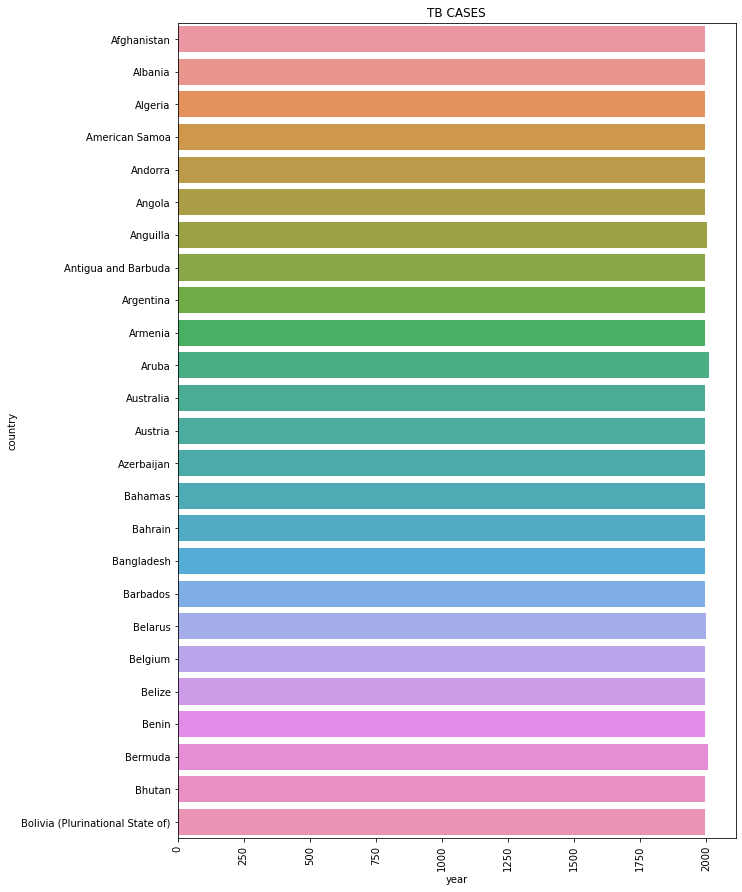

In [184]:
plt.figure(figsize=(10,15))
ax = sns.barplot(x=TB_cases['year'], y=TB_cases[:25]['country'])
plt.title("TB CASES")
ax.tick_params(axis='x', rotation=90)
plt.show()

The above is the visualization on the year when does the countries started reporting the cases.

References:
https://www.geeksforgeeks.org/bar-plot-in-matplotlib/

https://www.digitalocean.com/community/tutorials/pandas-melt-unmelt-pivot-function